# Logistic regression

Logistic regression is a supervised machine learning algorithm that predicts the probability, ranging from 0 to 1, of a datapoint belonging to a specific category, or class. These probabilities can then be used to assign, or classify, observations to the more probable group.

For example, we could use a logistic regression model to predict the probability that an incoming email is spam. If that probability is greater than 0.5, we could automatically send it to a spam folder. This is called binary classification because there are only two groups (eg., spam or not spam).

Some other examples of problems that we could solve using logistic regression:

* Disease identification — Is a tumor malignant?
* Customer conversion — Will a customer arriving on a sign-up page enroll in a service?

Linear Regression Approach
With the data from Codecademy University, we want to predict whether each student will pass their final exam. Recall that in linear regression, we fit a line of the following form to the data:

<img src="Assets/logistic.png">

where

y is the value we are trying to predict
b_0 is the intercept of the regression line
b_1, b_2, … b_n are the coefficients
x_1, x_2, … x_n are the predictors (also sometimes called features)

For our data, y is a binary variable, equal to either 1 (passing), or 0 (failing). We have only one predictor (x_1): num_hours_studied. Below we’ve fitted a linear regression model to our data and plotted the results. The best fit line is in red.

<<img src="Assets/linear_regression_ccu.svg">

We see that the linear model does not fit the data well. Our goal is to predict whether a student passes or fails; however, a best fit line allows predictions between negative and positive infinity.

To build a logistic regression model, we apply a logit link function to the left-hand side of our linear regression function. Remember the equation for a linear model looks like this:

<img src="Assets/logit.png">

This means that we are fitting the curve shown below to our data — instead of a line, like in linear regression:

<img src="Assets/sigmoid_hours_studied_basic.svg">

Notice that the red line stays between 0 and 1 on the y-axis. It now makes sense to interpret this value as a probability of group membership; whereas that would have been non-sensical for regular linear regression.

Note that this is a pretty nifty trick for adapting a linear regression model to solve classification problems! There are actually many other kinds of link functions that we can use for different adaptations.

Note that we’ve replaced y with the letter p because we are going to interpret it as a probability (eg., the probability of a student passing the exam). The whole left-hand side of this equation is called log-odds because it is the natural logarithm (ln) of odds (p/(1-p)). The right-hand side of this equation looks exactly like regular linear regression!

In order to understand how this link function works, let’s dig into the interpretation of log-odds a little more. The odds of an event occurring is:

<img src="Assets/odds.png">

For example, suppose that the probability a student passes an exam is 0.7. That means the probability of failing is 1 - 0.7 = 0.3. Thus, the odds of passing are 2.33

This means that students are 2.33 times more likely to pass than to fail.

Odds can only be a positive number. When we take the natural log of odds (the log odds), we transform the odds from a positive value to a number between negative and positive infinity — which is exactly what we need! The logit function (log odds) transforms a probability (which is a number between 0 and 1) into a continuous value that can be positive or negative.

In [2]:
import numpy as np

odds_of_rain = 0.04 / 0.06
print(odds_of_rain)
# Calculate log_odds_of_rain

log_odds_of_rain = np.log(odds_of_rain)
print(log_odds_of_rain)

0.6666666666666667
-0.4054651081081643


## Sigmoid Function

Suppose that we want to fit a model that predicts whether a visitor to a website will make a purchase. We’ll use the number of minutes they spent on the site as a predictor. The following code fits the model:

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(min_on_site, purchase)

Next, just like linear regression, we can use the right-hand side of our regression equation to make predictions for each of our original datapoints as follows:

In [ ]:
log_odds = model.intercept_ + model.coef_ * min_on_site 
print(log_odds)

Notice that these predictions range from negative to positive infinity: these are log odds. 

We can turn log odds into a probability. In Python, we can do this simultaneously for all of the datapoints using NumPy (loaded as np):

The calculation that we just did required us to use something called the sigmoid function, which is the inverse of the logit function. The sigmoid function produces the S-shaped curve we saw previously.

In [ ]:
np.exp(log_odds)/(1+ np.exp(log_odds))


## Fitting a model in sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

After creating the object, we need to fit our model on the data. We can accomplish this using the .fit() method, which takes two parameters: a matrix of features and a matrix of class labels (the outcome we are trying to predict).

In [ ]:
model.fit(features, labels)

Now that the model is trained, we can access a few useful attributes:

model.coef_ is a vector of the coefficients of each feature
model.intercept_ is the intercept
The coefficients can be interpreted as follows:

* Large positive coefficient: a one unit increase in that feature is associated with a large increase in the log odds (and therefore probability) of a datapoint belonging to the positive class (the outcome group labeled as 1)
* Large negative coefficient: a one unit increase in that feature is associated with a large decrease in the log odds/probability of belonging to the positive class.
* Coefficient of 0: The feature is not associated with the outcome.
One important note is that sklearn‘s logistic regression implementation requires the features to be standardized because regularization is implemented by default.

In [ ]:
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression

cc_lr =  LogisticRegression()
cc_lr.fit(X_train, y_train)
# Print the intercept and coefficients here:
print(cc_lr.intercept_)
print(cc_lr.coef_)

## Predictions in sklearn
Using a trained model, we can predict whether new datapoints belong to the positive class (the group labeled as 1) using the .predict() method. The input is a matrix of features and the output is a vector of predicted labels, 1 or 0.

In [ ]:
print(model.predict(features))

If we are more interested in the predicted probability of group membership, we can use the .predict_proba() method. The input to predict_proba() is also a matrix of features and the output is an array of probabilities, ranging from 0 to 1:

In [ ]:
print(model.predict_proba(features)[:,1])
# Sample output: [0.32 0.75  0.55 0.20 0.44]

By default, .predict_proba() returns the probability of class membership for both possible groups. In the example code above, we’ve only printed out the probability of belonging to the positive class. Notice that datapoints with predicted probabilities greater than 0.5 (the second and third datapoints in this example) were classified as 1s by the .predict() method. This is a process known as thresholding. As we can see here, sklearn sets the default classification threshold probability as 0.5.

In [ ]:
# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

# Print out the predicted outcomes for the test data
print(cc_lr.predict(X_test))
# Print out the predicted probabilities for the test data
print(cc_lr.predict_proba(X_test)[:,1])
# Print out the true outcomes for the test data
print(y_test)


## Classification Thresholding
As we’ve seen, logistic regression is used to predict the probability of group membership. Once we have this probability, we need to make a decision about what class a datapoint belongs to. This is where the classification threshold comes in!

The default threshold for sklearn is 0.5. If the predicted probability of an observation belonging to the positive class is greater than or equal to the threshold, 0.5, the datapoint is assigned to the positive class.

We can choose to change the threshold of classification based on the use-case of our model. For example, if we are creating a logistic regression model that classifies whether or not an individual has cancer, we may want to be more sensitive to the positive cases. We wouldn’t want to tell someone they don’t have cancer when they actually do!

<img src="Assets/Threshold-01.svg">

In order to ensure that most patients with cancer are identified, we can move the classification threshold down to 0.3 or 0.4, increasing the sensitivity of our model to predicting a positive cancer classification. While this might result in more overall misclassifications, we are now missing fewer of the cases we are trying to detect: actual cancer patients.

<img src = "Assets/Threshold-02.svg">

In [ ]:
# Pick an alternative threshold here:
alternative_threshold = 0.6
# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

# Print out the predicted outcomes for the test data
print(cc_lr.predict(X_test))

# Print out the predicted probabilities for the test data
print(cc_lr.predict_proba(X_test)[:,1])

# Print out the true outcomes for the test data
print(y_test)


## Confusion matrix
When we fit a machine learning model, we need some way to evaluate it. Often, we do this by splitting our data into training and test datasets. We use the training data to fit the model; then we use the test set to see how well the model performs with new data.

As a first step, data scientists often look at a confusion matrix, which shows the number of true positives, false positives, true negatives, and false negatives.

For example, suppose that the true and predicted classes for a logistic regression model are:

In [ ]:
y_true = [0, 0, 1, 1, 1, 0, 0, 1, 0, 1]
y_pred = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]

In [ ]:
# Create confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

In [ ]:
#Output
array([[3, 2],
       [1, 4]])


This output tells us that there are 3 true negatives, 1 false negative, 4 true positives, and 2 false positives. Ideally, we want the numbers on the main diagonal (in this case, 3 and 4, which are the true negatives and true positives, respectively) to be as large as possible.

## Accuracy, Recall, Precision, F1 Score
Once we have a confusion matrix, there are a few different statistics we can use to summarize the four values in the matrix. These include accuracy, precision, recall, and F1 score. We won’t go into much detail about these metrics here, but a quick summary is shown below (T = true, F = false, P = positive, N = negative). For all of these metrics, a value closer to 1 is better and closer to 0 is worse.

* Accuracy = (TP + TN)/(TP + FP + TN + FN)
* Precision = TP/(TP + FP)
* Recall = TP/(TP + FN)
* F1 score: weighted average of precision and recall

In sklearn, we can calculate these metrics as follows:

In [ ]:
# accuracy:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))
# output: 0.7

# precision:
from sklearn.metrics import precision_score
print(precision_score(y_true, y_pred))
# output: 0.67

# recall: 
from sklearn.metrics import recall_score
print(recall_score(y_true, y_pred))
# output: 0.8

# F1 score
from sklearn.metrics import f1_score
print(f1_score(y_true, y_pred))
# output: 0.73

## Logistic regression project

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

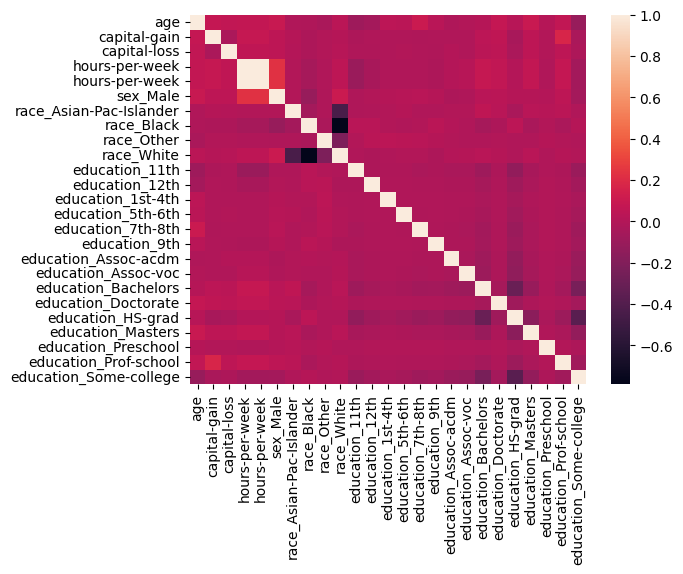

Model Parameters, Intercept:
-5.606068813075926
Model Parameters, Coeff:
[[ 3.67549341e-02  3.14854374e-04  6.66544875e-04  1.46284974e-02
   1.75618619e-02  1.03300674e+00  0.00000000e+00 -3.42420963e-01
   0.00000000e+00  9.28264857e-02 -5.74101423e-01  0.00000000e+00
   0.00000000e+00 -3.99796023e-01 -8.95818041e-01 -5.01176176e-01
   5.73832855e-01  5.48758571e-01  1.28446381e+00  1.79943235e+00
   0.00000000e+00  1.60079916e+00  0.00000000e+00  1.82435192e+00
   3.86324487e-01]]
Confusion Matrix on test set:
[[4775  251]
 [ 879  608]]
Accuracy Score on test set: 0.8265008444649163
                       var      coef
14       education_7th-8th -0.895818
10          education_11th -0.574101
15           education_9th -0.501176
13       education_5th-6th -0.399796
7               race_Black -0.342421
1             capital-gain  0.000315
2             capital-loss  0.000667
3           hours-per-week  0.014628
4           hours-per-week  0.017562
0                      age  0.036755


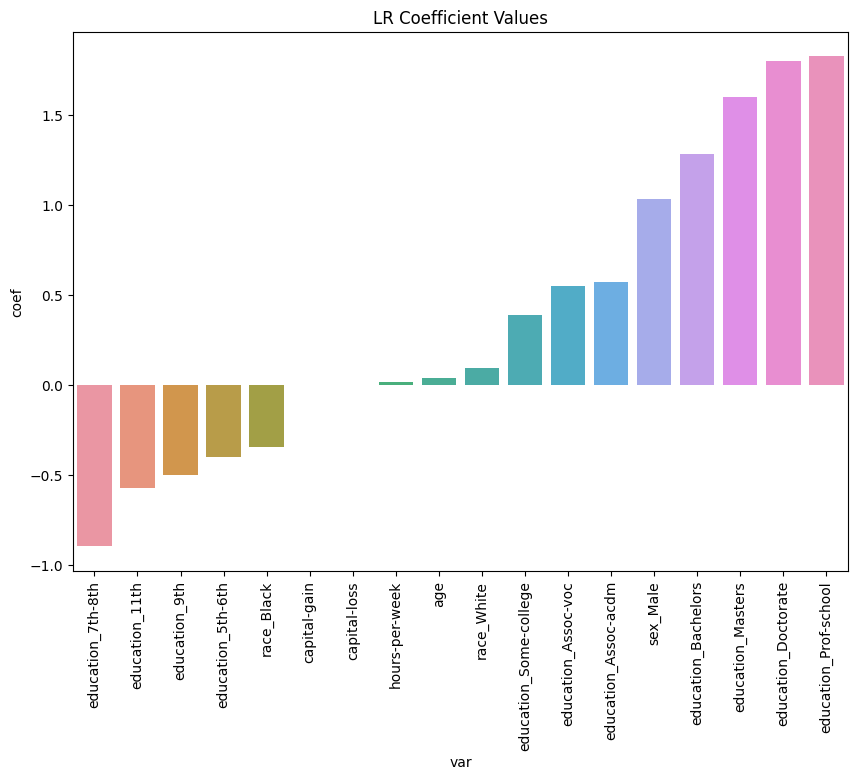

ROC AUC score: 0.8456729779858922


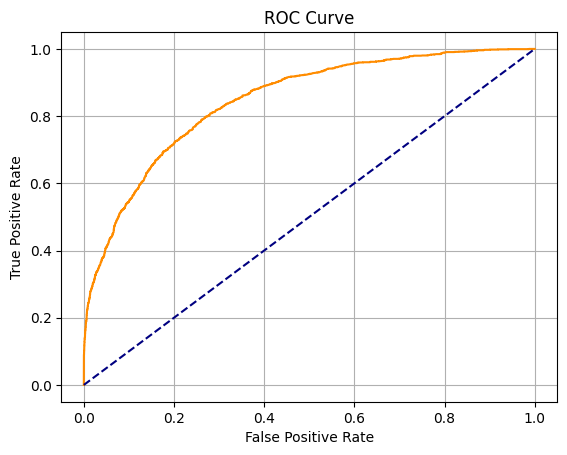

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('Datasets/census_income.csv',header = None, names = col_names)

#Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
print(df.head())

#1. Check Class Imbalance
print(df.income.value_counts(normalize=True))

#2. Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education']
X = pd.get_dummies(df[feature_cols], drop_first=True)

#3. Create a heatmap of X data to see feature correlation
plt.figure()
sns.heatmap(X.corr())#, annot=True)
plt.show()
plt.close()

#4. Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greater than 50k
y = np.where(df.income=='<=50K', 0, 1)

#5a. Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=.2)

#5b. Fit LR model with sklearn on train set, and predicting on the test set
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

#6. Print model parameters (intercept and coefficients)
print('Model Parameters, Intercept:')
print(log_reg.intercept_[0])
print('Model Parameters, Coeff:')
print(log_reg.coef_)

#7. Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.
print('Confusion Matrix on test set:')
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy Score on test set: {log_reg.score(x_test, y_test)}')

# 8.Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')
print(coef_df)

#9. barplot of the coefficients sorted in ascending order
plt.figure(figsize = (10,7))
sns.barplot(data=coef_df, x='var', y='coef')
plt.xticks(rotation=90);
plt.title('LR Coefficient Values')
plt.show()
plt.close()

#10. Plot the ROC curve and print the AUC value.
y_pred_prob = log_reg.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.title('ROC Curve')
plt.grid()
plt.show()



